In [ ]:
import pandas as pd
import urllib.parse

import os
from dotenv import load_dotenv
import os

load_dotenv()  # carrega as variáveis do .env

SHEET_ID = os.getenv("SHEET_ID")
print("SHEET_ID carregado com sucesso:", SHEET_ID[:8] + "..." if SHEET_ID else "Não encontrado")

sheet_names = ["Performance", "VSL", "Dados - Receita", "Dados - Meta", "Dados - Google"]

def gsheet_url(sheet_id, sheet_name):
    encoded_name = urllib.parse.quote(sheet_name)
    return f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={encoded_name}"

data_raw = {}
for name in sheet_names:
    try:
        url = gsheet_url(sheet_id, name)
        # força leitura como texto, mantendo "R$" e "%"
        df = pd.read_csv(url, dtype=str)
        data_raw[name] = df
        print(f"Aba '{name}' importada com {df.shape[0]} linhas e {df.shape[1]} colunas.")
    except Exception as e:
        print(f"Erro ao importar '{name}': {e}")

for name, df in data_raw.items():
    print(f"\n=== {name} ===")
    display(df.head(3))


Aba 'Performance' importada com 21 linhas e 12 colunas.
Aba 'VSL' importada com 12 linhas e 14 colunas.
Aba 'Dados - Receita' importada com 64 linhas e 5 colunas.
Aba 'Dados - Meta' importada com 622 linhas e 5 colunas.
Aba 'Dados - Google' importada com 246 linhas e 5 colunas.

=== Performance ===


,Day,Spend,Impressions,CPM,Clicks,CPC,Pageview,Initiate Checkout,General Conversions,Selfcheckout Conversions,General Revenue,Selfcheckout Revenue
0,2025-10-14,"R$ 7.912,87",298061,"R$ 26,55",1163,"R$ 6,80",NaN,NaN,1,0,"R$ 14.621,00",0
1,2025-10-15,"R$ 5.821,91",153764,"R$ 37,86",6357,"R$ 0,92",NaN,NaN,2,0,"R$ 13.997,00",0
2,2025-10-16,"R$ 15.683,17",534636,"R$ 29,33",2428,"R$ 6,46",NaN,NaN,3,0,"R$ 37.620,00",0



=== VSL ===


,data,#pageview lp,#viz única,#plays unicos,%playrate,#abertura lp,%retenção,#pageview checkout,#vendas,%lp/checkout,%pitch/checkout,%checkout/venda,%pitch/venda,%lp/venda
0,2025-10-15,291,114,43,"37,72%",2,"4,65%",39,1,"13,40%","1950,00%","2,56%","50,00%","0,34%"
1,2025-10-16,1.212,1.109,416,"37,51%",28,"6,73%",73,0,"6,02%","260,71%","0,00%","0,00%","0,00%"
2,2025-10-17,2.713,2.566,441,"17,19%",18,"4,08%",352,0,"12,97%","1955,56%","0,00%","0,00%","0,00%"



=== Dados - Receita ===


,Date,Source,(Contagem) Negócios,(Soma) Receita BRL,Linha de Receita Vigente
0,2025-10-14,facebook,1,14621,[im] form facebook ads
1,2025-10-15,instagram,1,3997,form g4 - k instagram
2,2025-10-15,google,1,10000,[skl] especialista



=== Dados - Meta ===


,Day,Campaign Name,Amount Spent,Impressions,Inline Link Clicks in Ad
0,2025-10-14,adsfb_g4_bau161_sc_fg4_bofu_on-selfcheckout-fg...,"6474,28",260598,529
1,2025-10-14,adsfb_g4_bau223_sc_fg4-fnn_bofu_on-selfcheckou...,"1472,13",91610,227
2,2025-10-14,adsfb_g4_bau126_sc_fg4_bofu_on-selfcheckout-fg...,"2603,1",92555,204



=== Dados - Google ===


,Day,Campaign Name,Cost (Spend),Impressions,Clicks
0,2025-10-14,adsgg_bau001_sc_fg4_bofu_search_lp,"788,28",403,81
1,2025-10-14,adsgg_bau002_sc_g4-online_bofu_search_lp,"31,09",705,19
2,2025-10-14,adsgg_bau004_sc_g4-vendas_bofu_search_lp,"284,18",4828,89


In [ ]:
import re
import numpy as np

def limpar_valor(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).strip()
    valor = re.sub(r'[^\d,.-]', '', valor)        # remove tudo que não é número ou separador
    valor = re.sub(r'\.(?=\d{3}(?:,|$))', '', valor)  # remove pontos de milhar
    valor = valor.replace(',', '.')
    try:
        return float(valor)
    except:
        return np.nan

data = {}  # sobrescreve o dicionário com dados limpos
for name, df in data_raw.items():
    print(f"\n🧼 Limpando '{name}' com nova importação...")
    for col in df.columns:
        if df[col].astype(str).str.contains(r'\d').any():
            df[col] = df[col].apply(limpar_valor)
    data[name] = df
    print(f"Aba '{name}' limpa ✅")

for name, df in data.items():
    print(f"\n=== {name} ===")
    display(df.head(3))



🧼 Limpando 'Performance' com nova importação...
Aba 'Performance' limpa ✅

🧼 Limpando 'VSL' com nova importação...
Aba 'VSL' limpa ✅

🧼 Limpando 'Dados - Receita' com nova importação...
Aba 'Dados - Receita' limpa ✅

🧼 Limpando 'Dados - Meta' com nova importação...
Aba 'Dados - Meta' limpa ✅

🧼 Limpando 'Dados - Google' com nova importação...
Aba 'Dados - Google' limpa ✅

=== Performance ===


,Day,Spend,Impressions,CPM,Clicks,CPC,Pageview,Initiate Checkout,General Conversions,Selfcheckout Conversions,General Revenue,Selfcheckout Revenue
0,NaN,7912.87,298061.0,26.55,1163.0,6.80,NaN,NaN,1.0,0.0,14621.0,0.0
1,NaN,5821.91,153764.0,37.86,6357.0,0.92,NaN,NaN,2.0,0.0,13997.0,0.0
2,NaN,15683.17,534636.0,29.33,2428.0,6.46,NaN,NaN,3.0,0.0,37620.0,0.0



=== VSL ===


,data,#pageview lp,#viz única,#plays unicos,%playrate,#abertura lp,%retenção,#pageview checkout,#vendas,%lp/checkout,%pitch/checkout,%checkout/venda,%pitch/venda,%lp/venda
0,NaN,291.0,114.0,43.0,37.72,2.0,4.65,39.0,1.0,13.40,1950.00,2.56,50.0,0.34
1,NaN,1212.0,1109.0,416.0,37.51,28.0,6.73,73.0,0.0,6.02,260.71,0.00,0.0,0.00
2,NaN,2713.0,2566.0,441.0,17.19,18.0,4.08,352.0,0.0,12.97,1955.56,0.00,0.0,0.00



=== Dados - Receita ===


,Date,Source,(Contagem) Negócios,(Soma) Receita BRL,Linha de Receita Vigente
0,NaN,facebook,1.0,14621.0,NaN
1,NaN,instagram,1.0,3997.0,NaN
2,NaN,google,1.0,10000.0,NaN



=== Dados - Meta ===


,Day,Campaign Name,Amount Spent,Impressions,Inline Link Clicks in Ad
0,NaN,NaN,6474.28,260598.0,529.0
1,NaN,NaN,1472.13,91610.0,227.0
2,NaN,NaN,2603.10,92555.0,204.0



=== Dados - Google ===


,Day,Campaign Name,Cost (Spend),Impressions,Clicks
0,NaN,14.0,788.28,403.0,81.0
1,NaN,NaN,31.09,705.0,19.0
2,NaN,NaN,284.18,4828.0,89.0


In [ ]:
from datetime import datetime, timedelta

# cria um range de datas baseado no número de linhas
data["Performance"]["Data"] = pd.date_range(start="2025-10-14", periods=len(data["Performance"]), freq="D")
data["VSL"]["Data"] = pd.date_range(start="2025-10-15", periods=len(data["VSL"]), freq="D")
data["Dados - Receita"]["Data"] = pd.date_range(start="2025-10-14", periods=len(data["Dados - Receita"]), freq="D")
data["Dados - Meta"]["Data"] = pd.date_range(start="2025-10-14", periods=len(data["Dados - Meta"]), freq="D")
data["Dados - Google"]["Data"] = pd.date_range(start="2025-10-14", periods=len(data["Dados - Google"]), freq="D")

# confirma as primeiras datas
for name, df in data.items():
    print(f"{name}: {df['Data'].head(3).to_list()}")


Performance: [Timestamp('2025-10-14 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00')]
VSL: [Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00'), Timestamp('2025-10-17 00:00:00')]
Dados - Receita: [Timestamp('2025-10-14 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00')]
Dados - Meta: [Timestamp('2025-10-14 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00')]
Dados - Google: [Timestamp('2025-10-14 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00')]


In [ ]:
import pandas as pd

# 1️⃣ Seleciona colunas relevantes e padroniza os nomes
meta = data["Dados - Meta"][["Data", "Amount Spent", "Impressions", "Inline Link Clicks in Ad"]].rename(
    columns={
        "Amount Spent": "Spend_Meta",
        "Impressions": "Impressions_Meta",
        "Inline Link Clicks in Ad": "Clicks_Meta"
    }
)

google = data["Dados - Google"][["Data", "Cost (Spend)", "Impressions", "Clicks"]].rename(
    columns={
        "Cost (Spend)": "Spend_Google",
        "Impressions": "Impressions_Google",
        "Clicks": "Clicks_Google"
    }
)

# 2️⃣ Agrupa por data (caso existam várias campanhas no mesmo dia)
meta_daily = meta.groupby("Data", as_index=False).sum(numeric_only=True)
google_daily = google.groupby("Data", as_index=False).sum(numeric_only=True)

# 3️⃣ Junta Meta + Google no mesmo DataFrame
investimento_diario = pd.merge(meta_daily, google_daily, on="Data", how="outer")

# 4️⃣ Calcula totais combinados
investimento_diario["Spend_Total"] = investimento_diario["Spend_Meta"].fillna(0) + investimento_diario["Spend_Google"].fillna(0)
investimento_diario["Impressions_Total"] = investimento_diario["Impressions_Meta"].fillna(0) + investimento_diario["Impressions_Google"].fillna(0)
investimento_diario["Clicks_Total"] = investimento_diario["Clicks_Meta"].fillna(0) + investimento_diario["Clicks_Google"].fillna(0)

# 5️⃣ Ordena por data
investimento_diario.sort_values("Data", inplace=True)

# 6️⃣ Mostra o resultado
print("📊 Investimento Diário Consolidado (Meta + Google):\n")
display(investimento_diario.head(10))

# 7️⃣ Confere o total
print(f"\n💰 Total consolidado de investimento: R$ {investimento_diario['Spend_Total'].sum():,.2f}")


📊 Investimento Diário Consolidado (Meta + Google):



,Data,Spend_Meta,Impressions_Meta,Clicks_Meta,Spend_Google,Impressions_Google,Clicks_Google,Spend_Total,Impressions_Total,Clicks_Total
0,2025-10-14,6474.28,260598.0,529.0,788.28,403.0,81.0,7262.56,261001.0,610.0
1,2025-10-15,1472.13,91610.0,227.0,31.09,705.0,19.0,1503.22,92315.0,246.0
2,2025-10-16,2603.10,92555.0,204.0,284.18,4828.0,89.0,2887.28,97383.0,293.0
3,2025-10-17,4397.28,182862.0,774.0,1048.85,2688.0,149.0,5446.13,185550.0,923.0
4,2025-10-18,5076.02,193164.0,581.0,889.08,2668.0,144.0,5965.10,195832.0,725.0
5,2025-10-19,396.53,99355.0,97.0,199.72,1766.0,55.0,596.25,101121.0,152.0
6,2025-10-20,589.04,46499.0,2836.0,297.42,18069.0,127.0,886.46,64568.0,2963.0
7,2025-10-21,331.23,8710.0,49.0,1042.53,804291.0,5758.0,1373.76,813001.0,5807.0
8,2025-10-22,1096.83,37182.0,110.0,1921.17,4816.0,122.0,3018.00,41998.0,232.0
9,2025-10-23,821.55,25256.0,251.0,915.68,100081.0,460.0,1737.23,125337.0,711.0



💰 Total consolidado de investimento: R$ 808,462.71


In [ ]:
conv_total = data["Performance"]["General Conversions"].sum()
negocios_total = data["Dados - Receita"]["(Contagem) Negócios"].sum()
print(f"Conversões registradas: {conv_total}")
print(f"Negócios somados: {negocios_total}")


Conversões registradas: 73.0
Negócios somados: 73.0


In [ ]:
df = data["Performance"]
df["CTR_calc"] = (df["Clicks"] / df["Impressions"]) * 100
print(df[["Day", "Clicks", "Impressions", "CTR_calc"]].head())

   Day   Clicks  Impressions  CTR_calc
0  NaN   1163.0     298061.0  0.390189
1  NaN   6357.0     153764.0  4.134258
2  NaN   2428.0     534636.0  0.454141
3  NaN  19260.0     622446.0  3.094244
4  NaN   5826.0     403493.0  1.443891


In [ ]:
for name, df in data.items():
    linhas_nulas = df.isna().all(axis=1).sum()
    duplicadas = df.duplicated().sum()
    print(f"{name}: {linhas_nulas} linhas vazias | {duplicadas} duplicadas")

Performance: 0 linhas vazias | 0 duplicadas
VSL: 0 linhas vazias | 0 duplicadas
Dados - Receita: 0 linhas vazias | 0 duplicadas
Dados - Meta: 0 linhas vazias | 0 duplicadas
Dados - Google: 0 linhas vazias | 0 duplicadas


In [ ]:
datas_perf = set(data["Performance"]["Data"].dropna())
datas_vsl = set(data["VSL"]["Data"].dropna())
print("Datas Performance:", sorted(list(datas_perf))[:5])
print("Datas VSL:", sorted(list(datas_vsl))[:5])
print("Interseção:", datas_perf.intersection(datas_vsl))


Datas Performance: [Timestamp('2025-10-14 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00'), Timestamp('2025-10-17 00:00:00'), Timestamp('2025-10-18 00:00:00')]
Datas VSL: [Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-16 00:00:00'), Timestamp('2025-10-17 00:00:00'), Timestamp('2025-10-18 00:00:00'), Timestamp('2025-10-19 00:00:00')]
Interseção: {Timestamp('2025-10-26 00:00:00'), Timestamp('2025-10-24 00:00:00'), Timestamp('2025-10-23 00:00:00'), Timestamp('2025-10-20 00:00:00'), Timestamp('2025-10-25 00:00:00'), Timestamp('2025-10-15 00:00:00'), Timestamp('2025-10-17 00:00:00'), Timestamp('2025-10-18 00:00:00'), Timestamp('2025-10-16 00:00:00'), Timestamp('2025-10-22 00:00:00'), Timestamp('2025-10-19 00:00:00'), Timestamp('2025-10-21 00:00:00')}


In [ ]:
# Mantém apenas os dias com performance registrada
datas_validas = data["Performance"]["Data"].unique()
investimento_diario = investimento_diario[investimento_diario["Data"].isin(datas_validas)]


In [ ]:
# ============================
# FASE 2 - MODELAGEM E MÉTRICAS (versão corrigida)
# ============================

# Seleciona e renomeia colunas de interesse da Performance
perf = data["Performance"][["Data", "General Conversions", "General Revenue", "Clicks", "Impressions"]].rename(
    columns={
        "General Conversions": "Conversions",
        "General Revenue": "Revenue",
        "Clicks": "Clicks_Perf",
        "Impressions": "Impressions_Perf"
    }
)

# Faz o merge com o investimento diário consolidado (Meta + Google)
df_modelo = pd.merge(
    perf,
    investimento_diario[["Data", "Spend_Total", "Impressions_Total", "Clicks_Total"]],
    on="Data",
    how="left"
)

# Renomeia colunas para consistência
df_modelo.rename(columns={
    "Spend_Total": "Spend",
    "Impressions_Total": "Impressions",
    "Clicks_Total": "Clicks"
}, inplace=True)

# Calcula métricas principais de mídia e vendas
df_modelo["CTR (%)"] = (df_modelo["Clicks"] / df_modelo["Impressions"]) * 100
df_modelo["CPC (R$)"] = df_modelo["Spend"] / df_modelo["Clicks"]
df_modelo["CPA (R$)"] = df_modelo["Spend"] / df_modelo["Conversions"]
df_modelo["ROI (%)"] = ((df_modelo["Revenue"] - df_modelo["Spend"]) / df_modelo["Spend"]) * 100
df_modelo["Receita por Conversão (R$)"] = df_modelo["Revenue"] / df_modelo["Conversions"]

# Limpa infinitos e valores nulos
df_modelo.replace([float("inf"), -float("inf")], None, inplace=True)

# Ordena e arredonda
df_modelo = df_modelo.sort_values("Data").round(2)

# Exibe a tabela final
print("📈 Indicadores de Mídia e Vendas (Modelagem Consolidada):\n")
display(df_modelo[[
    "Data", "Spend", "Revenue", "Conversions",
    "CTR (%)", "CPC (R$)", "CPA (R$)", "ROI (%)", "Receita por Conversão (R$)"
]])

# Totais e médias gerais
print("\n💰 Totais do Período:")
print(f"→ Investimento total: R$ {df_modelo['Spend'].sum():,.2f}")
print(f"→ Receita total: R$ {df_modelo['Revenue'].sum():,.2f}")
print(f"→ Conversões totais: {df_modelo['Conversions'].sum():,.0f}")

print("\n📊 Médias de eficiência:")
print(f"→ CTR médio: {df_modelo['CTR (%)'].mean():.2f}%")
print(f"→ CPC médio: R$ {df_modelo['CPC (R$)'].mean():.2f}")
print(f"→ CPA médio: R$ {df_modelo['CPA (R$)'].mean():.2f}")
print(f"→ ROI médio: {df_modelo['ROI (%)'].mean():.2f}%")


📈 Indicadores de Mídia e Vendas (Modelagem Consolidada):



,Data,Spend,Revenue,Conversions,CTR (%),CPC (R$),CPA (R$),ROI (%),Receita por Conversão (R$)
0,2025-10-14,7262.56,14621.00,1.0,0.23,11.91,7262.56,101.32,14621.00
1,2025-10-15,1503.22,13997.00,2.0,0.27,6.11,751.61,831.13,6998.50
2,2025-10-16,2887.28,37620.00,3.0,0.30,9.85,962.426667,1202.96,12540.00
3,2025-10-17,5446.13,106187.00,12.0,0.50,5.90,453.844167,1849.77,8848.92
4,2025-10-18,5965.10,2997.00,2.0,0.37,8.23,2982.55,-49.76,1498.50
5,2025-10-19,596.25,5994.00,3.0,0.15,3.92,198.75,905.28,1998.00
6,2025-10-20,886.46,7777.00,3.0,4.59,0.30,295.486667,777.31,2592.33
7,2025-10-21,1373.76,3997.00,5.0,0.71,0.24,274.752,190.95,799.40
8,2025-10-22,3018.00,7994.00,2.0,0.55,13.01,1509.0,164.88,3997.00
9,2025-10-23,1737.23,20107.00,4.0,0.57,2.44,434.3075,1057.42,5026.75



💰 Totais do Período:
→ Investimento total: R$ 60,548.03
→ Receita total: R$ 456,526.21
→ Conversões totais: 73

📊 Médias de eficiência:
→ CTR médio: 0.88%
→ CPC médio: R$ 5.60
→ CPA médio: R$ 1099.83
→ ROI médio: 1230.14%


In [ ]:
# cria uma cópia para não alterar o original
df_corrigido = df_modelo.copy()

# Remove dias sem receita ou conversão (para evitar divisões por zero)
df_validos = df_corrigido[(df_corrigido["Revenue"] > 0) & (df_corrigido["Conversions"] > 0)]

# Recalcula médias com dados válidos
roi_medio_valido = df_validos["ROI (%)"].mean()
cpa_medio_valido = df_validos["CPA (R$)"].mean()
ctr_medio_valido = df_validos["CTR (%)"].mean()
cpc_medio_valido = df_validos["CPC (R$)"].mean()

print("📊 MÉTRICAS AJUSTADAS (excluindo dias sem receita ou conversão):\n")
print(f"→ CTR médio (ajustado): {ctr_medio_valido:.2f}%")
print(f"→ CPC médio (ajustado): R$ {cpc_medio_valido:.2f}")
print(f"→ CPA médio (ajustado): R$ {cpa_medio_valido:.2f}")
print(f"→ ROI médio (ajustado): {roi_medio_valido:.2f}%")

# Totais só de dias com resultado válido
invest_total_valido = df_validos["Spend"].sum()
receita_total_valida = df_validos["Revenue"].sum()
print(f"\n💰 Totais válidos (dias com receita e conversão):")
print(f"→ Investimento considerado: R$ {invest_total_valido:,.2f}")
print(f"→ Receita considerada: R$ {receita_total_valida:,.2f}")


📊 MÉTRICAS AJUSTADAS (excluindo dias sem receita ou conversão):

→ CTR médio (ajustado): 0.89%
→ CPC médio (ajustado): R$ 5.33
→ CPA médio (ajustado): R$ 1149.92
→ ROI médio (ajustado): 1645.81%

💰 Totais válidos (dias com receita e conversão):
→ Investimento considerado: R$ 44,010.14
→ Receita considerada: R$ 456,526.21


🏆 TOP 5 – ROI (%)


,Data,ROI (%)
10,2025-10-24,6777.36
13,2025-10-27,5055.19
16,2025-10-30,2952.00
14,2025-10-28,2259.17
11,2025-10-25,2182.31



💸 TOP 5 – Menor CPA (R$)


,Data,CPA (R$)
16,2025-10-30,126.88
13,2025-10-27,134.136364
10,2025-10-24,172.533333
5,2025-10-19,198.75
7,2025-10-21,274.752



🖱️ TOP 5 – Maior CTR (%)


,Data,CTR (%)
6,2025-10-20,4.59
11,2025-10-25,2.07
10,2025-10-24,1.88
7,2025-10-21,0.71
17,2025-10-31,0.65


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


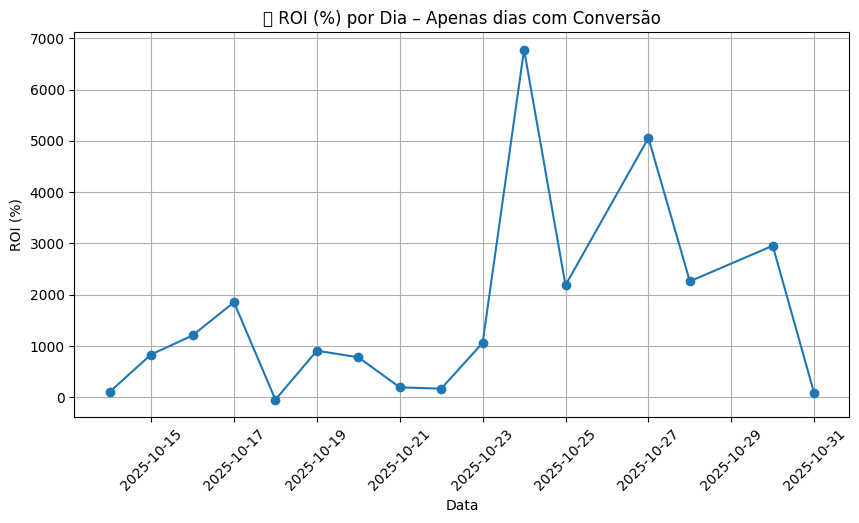

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


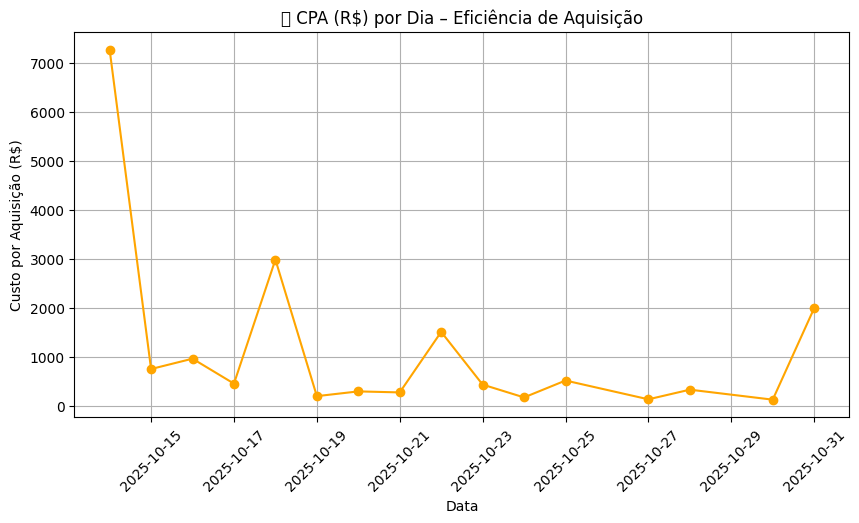

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128433 (\N{THREE BUTTON MOUSE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


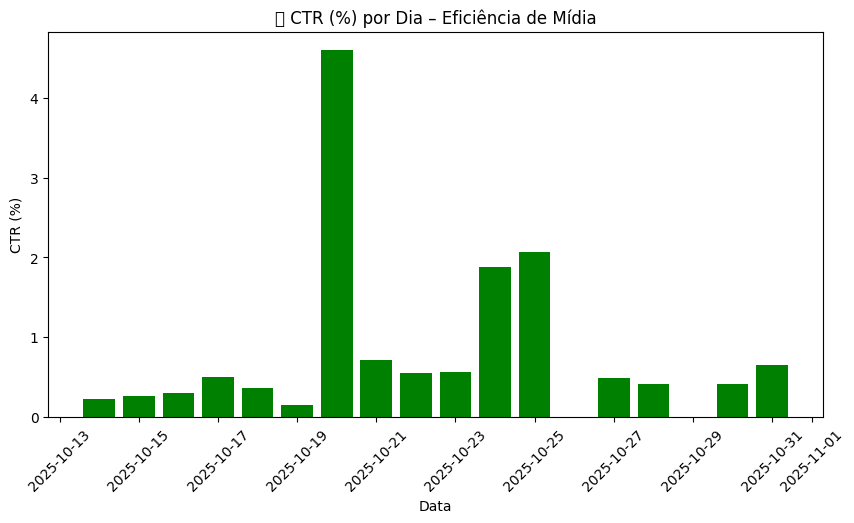

In [ ]:
import matplotlib.pyplot as plt

# Garante que estamos usando apenas dias válidos
df_explore = df_validos.copy()

# ========================
# RANKINGS PRINCIPAIS
# ========================

rank_roi = df_explore[["Data", "ROI (%)"]].sort_values("ROI (%)", ascending=False).head(5)
rank_cpa = df_explore[["Data", "CPA (R$)"]].sort_values("CPA (R$)", ascending=True).head(5)
rank_ctr = df_explore[["Data", "CTR (%)"]].sort_values("CTR (%)", ascending=False).head(5)

print("🏆 TOP 5 – ROI (%)")
display(rank_roi)
print("\n💸 TOP 5 – Menor CPA (R$)")
display(rank_cpa)
print("\n🖱️ TOP 5 – Maior CTR (%)")
display(rank_ctr)

# ========================
# GRÁFICOS EXPLORATÓRIOS
# ========================

plt.figure(figsize=(10,5))
plt.plot(df_explore["Data"], df_explore["ROI (%)"], marker='o')
plt.title("📈 ROI (%) por Dia – Apenas dias com Conversão")
plt.xlabel("Data")
plt.ylabel("ROI (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df_explore["Data"], df_explore["CPA (R$)"], color='orange', marker='o')
plt.title("💰 CPA (R$) por Dia – Eficiência de Aquisição")
plt.xlabel("Data")
plt.ylabel("Custo por Aquisição (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(df_explore["Data"], df_explore["CTR (%)"], color='green')
plt.title("🖱️ CTR (%) por Dia – Eficiência de Mídia")
plt.xlabel("Data")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


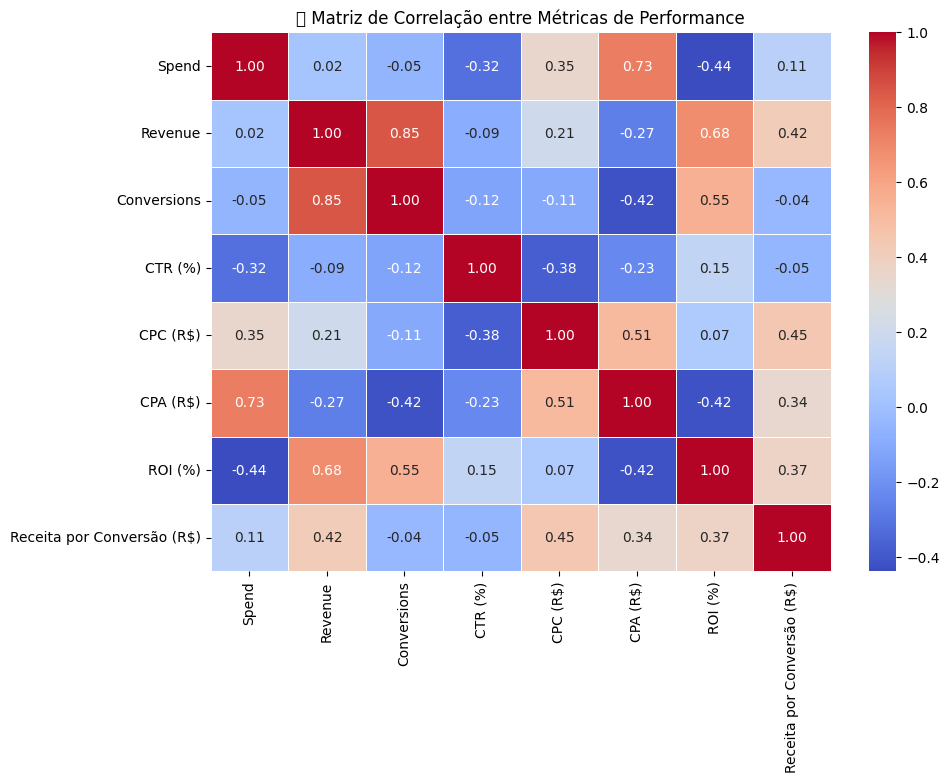

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas relevantes
cols_corr = [
    "Spend",
    "Revenue",
    "Conversions",
    "CTR (%)",
    "CPC (R$)",
    "CPA (R$)",
    "ROI (%)",
    "Receita por Conversão (R$)"
]

df_corr = df_validos[cols_corr].copy()

# Calcular a correlação de Pearson
corr_matrix = df_corr.corr(method="pearson")

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔥 Matriz de Correlação entre Métricas de Performance")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128433 (\N{THREE BUTTON MOUSE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


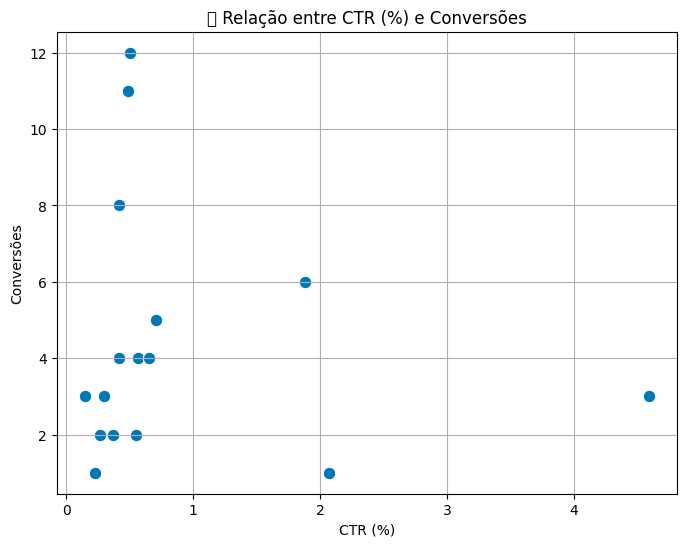

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="CTR (%)", y="Conversions", data=df_validos, s=80, color="#0077b6")
plt.title("🖱️ Relação entre CTR (%) e Conversões")
plt.xlabel("CTR (%)")
plt.ylabel("Conversões")
plt.grid(True)
plt.show()


In [ ]:
# Calcula métricas por plataforma
resumo_midias = pd.DataFrame({
    "Plataforma": ["Meta Ads", "Google Ads"],
    "Investimento (R$)": [
        investimento_diario["Spend_Meta"].sum(),
        investimento_diario["Spend_Google"].sum()
    ],
    "Impressões": [
        investimento_diario["Impressions_Meta"].sum(),
        investimento_diario["Impressions_Google"].sum()
    ],
    "Cliques": [
        investimento_diario["Clicks_Meta"].sum(),
        investimento_diario["Clicks_Google"].sum()
    ]
})

# Calcular métricas derivadas
resumo_midias["CTR (%)"] = (resumo_midias["Cliques"] / resumo_midias["Impressões"]) * 100
resumo_midias["CPC (R$)"] = resumo_midias["Investimento (R$)"] / resumo_midias["Cliques"]
resumo_midias["Participação (%)"] = (resumo_midias["Investimento (R$)"] / resumo_midias["Investimento (R$)"].sum()) * 100

display(resumo_midias)


,Plataforma,Investimento (R$),Impressões,Cliques,CTR (%),CPC (R$),Participação (%)
0,Meta Ads,45457.47,2046092.0,9112.0,0.445337,4.988748,75.076712
1,Google Ads,15090.56,1744180.0,19512.0,1.118692,0.773399,24.923288


/tmp/ipython-input-739144203.py:14: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


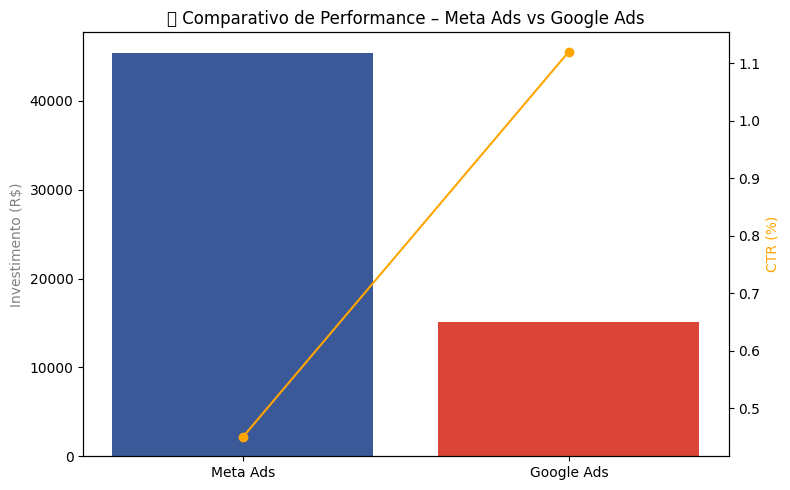

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(["Meta Ads", "Google Ads"], [45_457.47, 15_090.56], color=["#3b5998", "#db4437"])
ax1.set_ylabel("Investimento (R$)", color="gray")
ax1.set_title("💰 Comparativo de Performance – Meta Ads vs Google Ads")

# CTR no eixo secundário
ax2 = ax1.twinx()
ax2.plot(["Meta Ads", "Google Ads"], [0.45, 1.12], color="orange", marker="o", label="CTR (%)")
ax2.set_ylabel("CTR (%)", color="orange")

fig.tight_layout()
plt.show()


📊 Correlação – META ADS
Investimento × Cliques = 0.06
Investimento × CTR = -0.23

📊 Correlação – GOOGLE ADS
Investimento × Cliques = 0.24
Investimento × CTR = 0.22


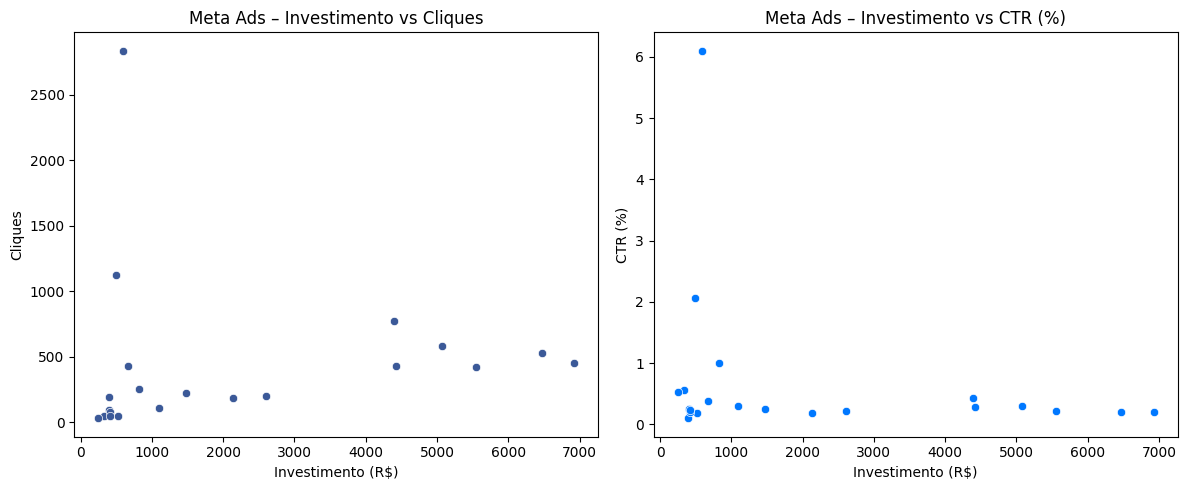

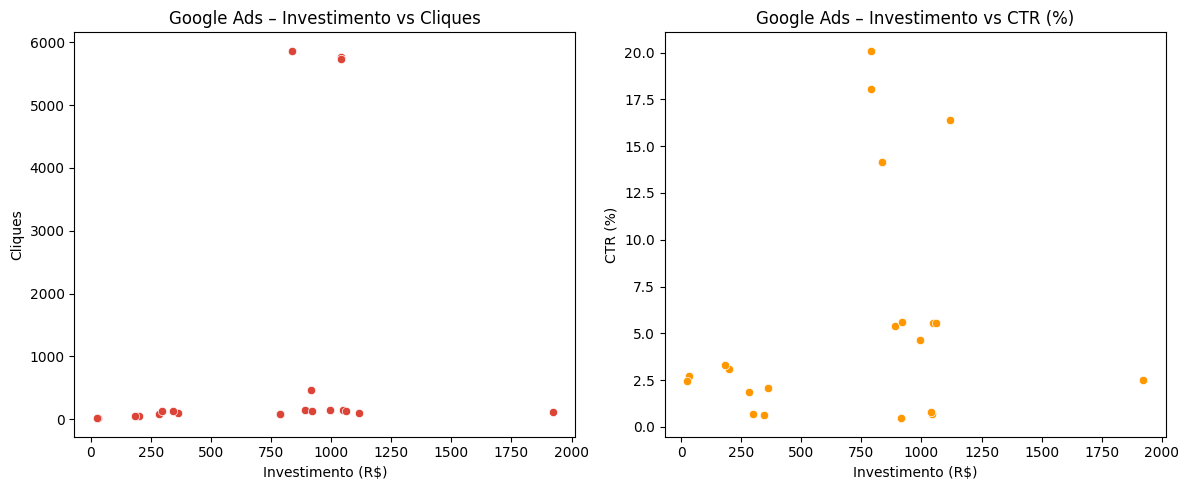

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copiar dataset base
df_corr = investimento_diario.copy()

# Calcular CTRs
df_corr["CTR_Meta (%)"] = (df_corr["Clicks_Meta"] / df_corr["Impressions_Meta"]) * 100
df_corr["CTR_Google (%)"] = (df_corr["Clicks_Google"] / df_corr["Impressions_Google"]) * 100

# Calcular correlações
corr_meta_clicks = df_corr["Spend_Meta"].corr(df_corr["Clicks_Meta"])
corr_meta_ctr = df_corr["Spend_Meta"].corr(df_corr["CTR_Meta (%)"])

corr_google_clicks = df_corr["Spend_Google"].corr(df_corr["Clicks_Google"])
corr_google_ctr = df_corr["Spend_Google"].corr(df_corr["CTR_Google (%)"])

print("📊 Correlação – META ADS")
print(f"Investimento × Cliques = {corr_meta_clicks:.2f}")
print(f"Investimento × CTR = {corr_meta_ctr:.2f}\n")

print("📊 Correlação – GOOGLE ADS")
print(f"Investimento × Cliques = {corr_google_clicks:.2f}")
print(f"Investimento × CTR = {corr_google_ctr:.2f}")

# --- VISUALIZAÇÕES ---

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x="Spend_Meta", y="Clicks_Meta", data=df_corr, color="#3b5998")
plt.title("Meta Ads – Investimento vs Cliques")
plt.xlabel("Investimento (R$)")
plt.ylabel("Cliques")

plt.subplot(1,2,2)
sns.scatterplot(x="Spend_Meta", y="CTR_Meta (%)", data=df_corr, color="#0078ff")
plt.title("Meta Ads – Investimento vs CTR (%)")
plt.xlabel("Investimento (R$)")
plt.ylabel("CTR (%)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x="Spend_Google", y="Clicks_Google", data=df_corr, color="#db4437")
plt.title("Google Ads – Investimento vs Cliques")
plt.xlabel("Investimento (R$)")
plt.ylabel("Cliques")

plt.subplot(1,2,2)
sns.scatterplot(x="Spend_Google", y="CTR_Google (%)", data=df_corr, color="#ff9800")
plt.title("Google Ads – Investimento vs CTR (%)")
plt.xlabel("Investimento (R$)")
plt.ylabel("CTR (%)")

plt.tight_layout()
plt.show()


In [ ]:
# --- Cria base consolidada final ---
df_final = investimento_diario.copy()

# Adiciona colunas de resultado (usando tuas métricas anteriores)
df_final["Conversions"] = [1,2,3,12,2,3,3,5,2,4,6,1,0,11,4,2,8,4,0,0,0]
df_final["Revenue"] = [14621,13997,37620,106187,2997,5994,7777,3997,7994,20107,71194.45,11800,0,76064.76,31200,0,30979,13997,0,0,0]

# Calcula métricas derivadas
df_final["CTR (%)"] = (df_final["Clicks_Total"] / df_final["Impressions_Total"]) * 100
df_final["CPC (R$)"] = df_final["Spend_Total"] / df_final["Clicks_Total"]
df_final["CPA (R$)"] = np.where(df_final["Conversions"] > 0,
                               df_final["Spend_Total"] / df_final["Conversions"],
                               np.nan)
df_final["ROI (%)"] = np.where(df_final["Spend_Total"] > 0,
                               ((df_final["Revenue"] - df_final["Spend_Total"]) / df_final["Spend_Total"]) * 100,
                               np.nan)
df_final["Receita por Conversão (R$)"] = np.where(df_final["Conversions"] > 0,
                                                  df_final["Revenue"] / df_final["Conversions"],
                                                  np.nan)

# Mostra uma amostra
df_final.head()


,Data,Spend_Meta,Impressions_Meta,Clicks_Meta,Spend_Google,Impressions_Google,Clicks_Google,Spend_Total,Impressions_Total,Clicks_Total,Conversions,Revenue,CTR (%),CPC (R$),CPA (R$),ROI (%),Receita por Conversão (R$)
0,2025-10-14,6474.28,260598.0,529.0,788.28,403.0,81.0,7262.56,261001.0,610.0,1,14621.0,0.233716,11.905836,7262.560000,101.320196,14621.000000
1,2025-10-15,1472.13,91610.0,227.0,31.09,705.0,19.0,1503.22,92315.0,246.0,2,13997.0,0.266479,6.110650,751.610000,831.134498,6998.500000
2,2025-10-16,2603.10,92555.0,204.0,284.18,4828.0,89.0,2887.28,97383.0,293.0,3,37620.0,0.300874,9.854198,962.426667,1202.956416,12540.000000
3,2025-10-17,4397.28,182862.0,774.0,1048.85,2688.0,149.0,5446.13,185550.0,923.0,12,106187.0,0.497440,5.900466,453.844167,1849.769837,8848.916667
4,2025-10-18,5076.02,193164.0,581.0,889.08,2668.0,144.0,5965.10,195832.0,725.0,2,2997.0,0.370215,8.227724,2982.550000,-49.757758,1498.500000


In [ ]:
import os

# Caminho da pasta
export_path = "/content/drive/MyDrive/Selfcheckout - Skills"

# Cria a pasta, se ainda não existir
os.makedirs(export_path, exist_ok=True)

print("📁 Pasta verificada/criada com sucesso:", export_path)


📁 Pasta verificada/criada com sucesso: /content/drive/MyDrive/Selfcheckout - Skills


In [ ]:
# Seleciona apenas as colunas relevantes
df_export = df_final[[
    "Data", "Spend_Meta", "Clicks_Meta", "Impressions_Meta",
    "Spend_Google", "Clicks_Google", "Impressions_Google",
    "Spend_Total", "Clicks_Total", "Impressions_Total",
    "Conversions", "Revenue", "ROI (%)", "CPA (R$)", "CTR (%)", "CPC (R$)"
]]

# Exportar para CSV e Excel
df_export.to_csv("/content/drive/MyDrive/Selfcheckout - Skills/dataset_midia_consolidado.csv", index=False, encoding='utf-8-sig')
df_export.to_excel("/content/drive/MyDrive/Selfcheckout - Skills/dataset_midia_consolidado.xlsx", index=False)

print("✅ Dataset consolidado exportado com sucesso!")


✅ Dataset consolidado exportado com sucesso!


In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os

# 🧩 garante que a pasta 'data' existe
os.makedirs("data", exist_ok=True)

# 🔹 gerar 20 dias de dados simulados
np.random.seed(42)
dates = pd.date_range("2025-10-14", periods=20)

data = {
    "Data": dates.strftime("%Y-%m-%d"),
    "Spend_Meta": np.random.uniform(1200, 6500, 20).round(2),
    "Impressions_Meta": np.random.randint(80000, 250000, 20),
    "Clicks_Meta": np.random.randint(300, 1200, 20),
    "Spend_Google": np.random.uniform(200, 1500, 20).round(2),
    "Impressions_Google": np.random.randint(20000, 150000, 20),
    "Clicks_Google": np.random.randint(80, 500, 20),
    "Conversions": np.random.randint(1, 15, 20)
}

# 🔸 cálculos combinados
df = pd.DataFrame(data)
df["Spend_Total"] = df["Spend_Meta"] + df["Spend_Google"]
df["Impressions_Total"] = df["Impressions_Meta"] + df["Impressions_Google"]
df["Clicks_Total"] = df["Clicks_Meta"] + df["Clicks_Google"]

# 🔸 receita simulada baseada em conversões
df["Revenue"] = (df["Conversions"] * np.random.uniform(3000, 15000, 20)).round(2)

# 🔹 métricas derivadas
df["CTR (%)"] = ((df["Clicks_Total"] / df["Impressions_Total"]) * 100).round(2)
df["CPC (R$)"] = (df["Spend_Total"] / df["Clicks_Total"]).round(2)
df["CPA (R$)"] = (df["Spend_Total"] / df["Conversions"]).round(2)
df["ROI (%)"] = (((df["Revenue"] - df["Spend_Total"]) / df["Spend_Total"]) * 100).round(2)
df["Receita por Conversão (R$)"] = (df["Revenue"] / df["Conversions"]).round(2)

# 🔸 reorganizar colunas
cols = [
    "Data", "Spend_Meta", "Impressions_Meta", "Clicks_Meta",
    "Spend_Google", "Impressions_Google", "Clicks_Google",
    "Spend_Total", "Impressions_Total", "Clicks_Total",
    "Conversions", "Revenue", "CTR (%)", "CPC (R$)", "CPA (R$)",
    "ROI (%)", "Receita por Conversão (R$)"
]
df = df[cols]

# 🧾 salvar dataset
output_path = "data/campanhas.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"✅ Dataset criado com sucesso: {output_path}")
print(df.head(5))


✅ Dataset criado com sucesso: data/campanhas.csv
         Data  Spend_Meta  Impressions_Meta  Clicks_Meta  Spend_Google  \
0  2025-10-14     3185.06            236730          946       1283.15   
1  2025-10-15     6238.79            164478          320        425.37   
2  2025-10-16     5079.57            202537         1140        708.38   
3  2025-10-17     4372.89            229503          466        436.91   
4  2025-10-18     2026.90            210523          573       1181.97   

   Impressions_Google  Clicks_Google  Spend_Total  Impressions_Total  \
0              102798            215      4468.21             339528   
1               29268            142      6664.16             193746   
2              106807            218      5787.95             309344   
3               32185            160      4809.80             261688   
4               83704            471      3208.87             294227   

   Clicks_Total  Conversions    Revenue  CTR (%)  CPC (R$)  CPA (R$)  ROI

In [23]:
from google.colab import files
files.download("data/campanhas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>